# DLthon - 길찾는 오리들
## Base Settings

In [1]:
# importing the libraries
import keras
from keras import layers

keras.mixed_precision.set_global_policy('mixed_float16')

# importing the modules
import models_base, models_top, utils

2025-01-22 14:14:55.189890: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-22 14:14:55.197770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737522895.207395   99001 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737522895.209910   99001 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 14:14:55.220896: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets(
    "data/data_disruptive_feature_exclusion",
    batch_size=128)

Found 374 files belonging to 6 classes.
Using 225 files for training.
Using 149 files for validation.


I0000 00:00:1737522896.858610   99001 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
# designing the model
def eV2L_midsize3(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs) # image preprocessing
    x = models_base.EV2L((224, 224, 3))(x, training=False) # pre-trained model
    x = models_top.midsize3()(x) # top model
    outputs = layers.Dense(6, activation='softmax', name="classifier")(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                   metrics=['accuracy', 'f1_score'])
    
    return model

eV2L_midsize3().summary()

2025-01-22 14:14:58.061938: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast (Cast)                     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ image_preprocessing_v1          │ (None, 224, 224, 3)    │             7 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-l (Functional)   │ (None, 7, 7, 1280)     │   117,746,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ basic_midsize3 (Functional)     │ (None, 256)            │     1,841,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,590,317 (456.20 MB)

 Trainable params: 1,841,414 (7.02 MB)

 Non-trainable params: 117,748,903 (449.18 MB)

In [4]:
# training the model
eV2L_midsize3_history = eV2L_midsize3().fit(
    train_dataset.cache(),
    validation_data=val_dataset.cache(),
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_midsize3.keras'),
        utils.callback_earlystop(30)
    ],
)

Epoch 1/200


I0000 00:00:1737522933.406411   99117 cuda_dnn.cc:529] Loaded cuDNN version 90600


2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 11s/step - accuracy: 0.1521 - f1_score: 0.1052 - loss: 2.6880 - val_accuracy: 0.1328 - val_f1_score: 0.0394 - val_loss: 1.8728
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1298 - f1_score: 0.0955 - loss: 2.7167 - val_accuracy: 0.1328 - val_f1_score: 0.0394 - val_loss: 1.8695
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1302 - f1_score: 0.0907 - loss: 2.5503 - val_accuracy: 0.1406 - val_f1_score: 0.0563 - val_loss: 1.8387
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.2144 - f1_score: 0.1462 - loss: 2.1123 - val_accuracy: 0.1406 - val_f1_score: 0.0563 - val_loss: 1.8153
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2203 - f1_score: 0.1727 - loss: 2.0588 - val_accuracy: 0.1484 - val_f1_score: 0.0713 - val_loss: 1.8027
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2863 - f1_score: 0.2401 - loss: 1.8732 - val_accuracy: 0.1484 - val_f1_score: 0.0852 - val_loss: 1.7884
Epoch 7/200
2/

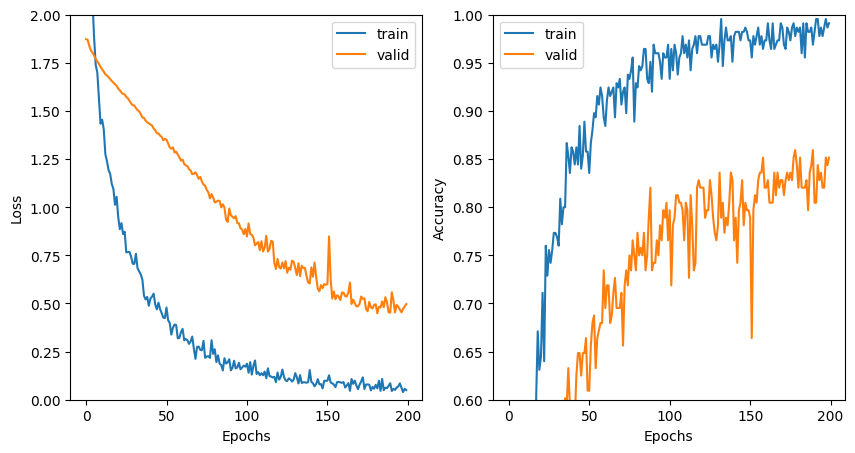

In [5]:
# visualizing the training process
utils.plot_history(eV2L_midsize3_history, loss_ylim=(0, 2), acc_ylim=(0.6, 1))

In [ ]:
# evaluating the model
test_loss, test_acc, test_f1 = keras.models.load_model('eV2L_midsize3.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.7619 - f1_score: 0.6512 - loss: 0.7485


ValueError: can only convert an array of size 1 to a Python scalar